In [5]:
%whos

Variable      Type               Data/Info
------------------------------------------
Actications   TFModuleWrapper    <module 'tensorflow.pytho<...>activations/__init__.py'>
Layers        TFModuleWrapper    <module 'tensorflow.pytho<...>eras/layers/__init__.py'>
Metrics       TFModuleWrapper    <module 'tensorflow.pytho<...>ras/metrics/__init__.py'>
Models        TFModuleWrapper    <module 'tensorflow.pytho<...>eras/models/__init__.py'>
Optimizer     TFModuleWrapper    <module 'tensorflow.pytho<...>/optimizers/__init__.py'>
Utils         TFModuleWrapper    <module 'tensorflow.pytho<...>keras/utils/__init__.py'>
keras         TFModuleWrapper    <module 'tensorflow.pytho<...>i/_v1/keras/__init__.py'>
np            module             <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
np_Images     ndarray            16785x224x224x3: 2526612480 elems, type `uint8`, 2526612480 bytes (2409.5654296875 Mb)
np_Labels     ndarray            16785: 16785 elems, type `int64`, 134280 bytes (1

In [ ]:
# !pip install imblearn

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow import keras
import matplotlib.pyplot as plot
import numpy as np
# from imblearn.over_sampling import BorderlineSMOTE

In [3]:
np_Images = np.load('./dataset/Image_224.npy') #converting the list of images to numpy array.
np_Labels = np.load('./dataset/Label_224.npy')

In [4]:
print("Shape of Images:",np_Images.shape)
print("Shape of Labels:",np_Labels.shape)

Shape of Images: (16785, 224, 224, 3)
Shape of Labels: (16785,)


In [4]:
np.bincount(np_Labels)

array([9955,  229,  766, 2061,  426, 3348])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
len(np_Images)

16785

In [8]:
X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(np_Images, np_Labels, test_size=0.1, random_state=1, stratify=np_Labels)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tmp, y_train_tmp, test_size=0.11, random_state=1 ,stratify=y_train_tmp)

In [9]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [10]:
len(X_train), len(y_train)

(13444, 13444)

In [11]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [12]:
X_train.shape, y_train.shape

((13444, 224, 224, 3), (13444,))

In [ ]:
# Images = (Images / 127.5) -1

In [13]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
np.bincount(y_train),np.bincount(y_test)

In [10]:
IMG_SHAPE = X_train[0].shape

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=IMG_SHAPE,
                                            include_top=False,   
                                            weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
base_model.trainable = False

In [11]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [80]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(1280, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(12, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(6, activation='softmax') 
])

In [81]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [160]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weights

In [113]:
# class_weight = {}

# for i in range(6):
#     class_weight[i] = class_weights[i]
    
# class_weight

In [114]:
# class_weight = [np.sqrt(np.sqrt(i)) for i in class_weights]
# class_weight

In [82]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_9 ( (None, 1280)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1280)              1639680   
_________________________________________________________________
batch_normalization_16 (Batc (None, 1280)              5120      
_________________________________________________________________
re_lu_16 (ReLU)              (None, 1280)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 12)                15372     
_________________________________________________________________
batch_normalization_17 (Batc (None, 12)               

In [50]:
base_model.trainable = True

In [51]:
base_model.trainable = False

In [59]:
model.trainable_variables

[<tf.Variable 'dense_11/kernel:0' shape=(1280, 1280) dtype=float32>,
 <tf.Variable 'dense_11/bias:0' shape=(1280,) dtype=float32>,
 <tf.Variable 'batch_normalization_6/gamma:0' shape=(1280,) dtype=float32>,
 <tf.Variable 'batch_normalization_6/beta:0' shape=(1280,) dtype=float32>,
 <tf.Variable 'dense_12/kernel:0' shape=(1280, 640) dtype=float32>,
 <tf.Variable 'dense_12/bias:0' shape=(640,) dtype=float32>,
 <tf.Variable 'batch_normalization_7/gamma:0' shape=(640,) dtype=float32>,
 <tf.Variable 'batch_normalization_7/beta:0' shape=(640,) dtype=float32>,
 <tf.Variable 'dense_13/kernel:0' shape=(640, 320) dtype=float32>,
 <tf.Variable 'dense_13/bias:0' shape=(320,) dtype=float32>,
 <tf.Variable 'batch_normalization_8/gamma:0' shape=(320,) dtype=float32>,
 <tf.Variable 'batch_normalization_8/beta:0' shape=(320,) dtype=float32>,
 <tf.Variable 'dense_14/kernel:0' shape=(320, 6) dtype=float32>,
 <tf.Variable 'dense_14/bias:0' shape=(6,) dtype=float32>]

In [83]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

In [84]:
#trained = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val,y_val))
trained = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val,y_val), callbacks=callback)

Train on 13444 samples, validate on 1662 samples
Epoch 1/30
13444/13444 [==============================] - 23s 2ms/sample - loss: 0.8602 - acc: 0.9327 - val_loss: 1.3228 - val_acc: 0.6282
Epoch 2/30
13444/13444 [==============================] - 17s 1ms/sample - loss: 0.7174 - acc: 0.9474 - val_loss: 1.4064 - val_acc: 0.5746
Epoch 3/30
13444/13444 [==============================] - 17s 1ms/sample - loss: 0.6518 - acc: 0.9490 - val_loss: 1.2907 - val_acc: 0.6336
Epoch 4/30
13444/13444 [==============================] - 17s 1ms/sample - loss: 0.5915 - acc: 0.9496 - val_loss: 1.1538 - val_acc: 0.6721
Epoch 5/30
13444/13444 [==============================] - 17s 1ms/sample - loss: 0.5378 - acc: 0.9495 - val_loss: 1.2143 - val_acc: 0.5981
Epoch 6/30
13444/13444 [==============================] - 17s 1ms/sample - loss: 0.4921 - acc: 0.9511 - val_loss: 1.1810 - val_acc: 0.6468
Epoch 7/30
13444/13444 [==============================] - 17s 1ms/sample - loss: 0.4535 - acc: 0.9505 - val_loss: 1.0

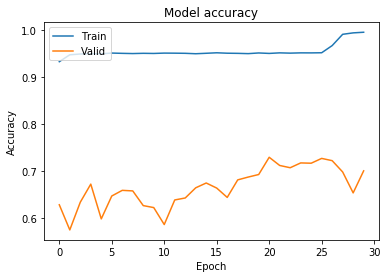

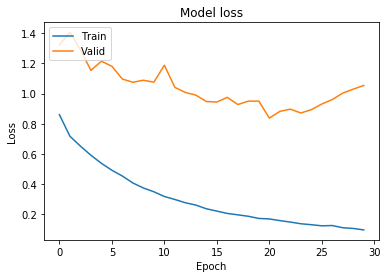

In [85]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

In [38]:
# test_images,test_labels = get_images('./test/')
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)
model.evaluate(X_test,y_test, verbose=1)

1679/1679 [==============================] - 2s 974us/sample - loss: 6.4955 - acc: 0.6820


[6.49550183462628, 0.68195355]

In [ ]:
model.predict(X_test)

In [21]:
model.save('97_2_per_mobilenet_v2.h5')